In [23]:
import os
import collections
path = '/Volumes/BACKUP_DISK/敏怡看这里/output'
cnt = 0
frame_sequence_dict = collections.defaultdict(list)
for root, dirs, files in os.walk(path):
    jpg_files = [x for x in files if x.endswith('.jpg')]
    path_split = root.split(os.path.sep)
    if len(jpg_files) > 0 and not path_split[-4].endswith('free_log'):
        subject = path_split[-4]
        gesture_class = path_split[-3]
        repeat = path_split[-2]
        pi_mark = path_split[-1]
#         print(subject)
        
        #invalid
        frame_sequence_dict['_'.join([subject,gesture_class,repeat])].append(len(jpg_files))
#             print('larger than 40', subject, gesture_class, repeat,pi_mark, len(jpg_files))
        frame_sequence_count.append(len(jpg_files))
#         print(jpg_files)


In [40]:
count = []
for key,value in frame_sequence_dict.items():
    if len(value) != 2:
        print('!=2',key)
    elif value[0] > 45 or value[1] > 45:
        print('>45',key, value[0],value[1])
    elif value[0] < 5 or value[1] < 5:
        print('<5',key, value[0], value[1])
    else:
        count += value

<5 zy_5_15 5 7
<5 bowen_3_5 4 4
<5 ya_0_7 4 6
>45 cici_0_7 72 72
<5 ca_0_19 5 5
<5 jerry_5_1 4 10
!=2 jerry_5_4
<5 jerry_5_3 1 13
<5 jerry_5_2 4 11
!=2 jerry_5_5
<5 geo_3_4 2 2


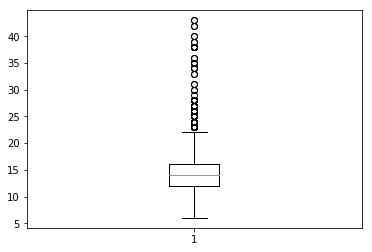

14.552263834544439


In [42]:
import matplotlib.pyplot as plt
plt.boxplot(count)
plt.show()
print(sum(count)/len(count))

In [75]:
import os
# from skimage.color import rgb2gray
import skimage
from skimage.filters import sobel
from skimage.io import imread
import scipy
import numpy as np
import matplotlib.pyplot as plt

def preprocess(dir_path):
    img_list = []
    for f in sorted(os.listdir(dir_path)):
        if f.endswith('.jpg') and not f.startswith('.'):
            img = imread(os.path.join(dir_path,f),as_gray=True)
            img = skimage.transform.resize(img, (48,64))
            img_list.append(img)
    sample = np.stack(img_list, axis=2)
    resample = scipy.ndimage.zoom(sample, (1,1,16/len(img_list)))
    resample_sobel = []
#     plt.figure(figsize=(16,4))
    for i in range(16):
        resample_sobel.append(sobel(resample[:,:,i]))
#         plt.subplot(2,8,i+1)
#         plt.imshow(resample_sobel[-1])
#     plt.show()
    resample_sobel = np.stack(resample_sobel, axis=2)
    return resample_sobel

In [76]:

cnt = 0
for key, value in frame_sequence_dict.items():
    if len(value) != 2 or value[0] > 45 or value[0] < 5 or value[1] < 5:
        continue
    else:
        p = key.split('_')
        p[0] += '_log'
        p.append('1')
        up_path = os.path.join(path,os.path.sep.join(p))
        p[-1] = '2'
        down_path = os.path.join(path,os.path.sep.join(p))
        print(key)
        up = preprocess(up_path)
        down = preprocess(down_path)
        sample = np.concatenate((up,down),axis=2)
        if sample.shape != (48, 64, 32):
            print(key,sample.shape)
        np.save(os.path.join('/Volumes/BACKUP_DISK/GRW_npfile',key+'.npy'), sample)
#         up_images = 

zy_0_18


/Users/liumy/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/liumy/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


zy_0_9
zy_0_0
zy_0_11
zy_0_7
zy_0_16
zy_0_6
zy_0_17
zy_0_1
zy_0_10
zy_0_19
zy_0_8
zy_0_4
zy_0_15
zy_0_3
zy_0_12
zy_0_2
zy_0_13
zy_0_5
zy_0_14
zy_7_18
zy_7_9
zy_7_0
zy_7_11
zy_7_7
zy_7_16
zy_7_6
zy_7_17
zy_7_1
zy_7_10
zy_7_19
zy_7_8
zy_7_4
zy_7_15
zy_7_3
zy_7_12
zy_7_2
zy_7_13
zy_7_5
zy_7_14
zy_6_18
zy_6_9
zy_6_0
zy_6_11
zy_6_7
zy_6_16
zy_6_6
zy_6_17
zy_6_1
zy_6_10
zy_6_19
zy_6_8
zy_6_4
zy_6_15
zy_6_3
zy_6_12
zy_6_2
zy_6_13
zy_6_5
zy_6_14
zy_1_18
zy_1_9
zy_1_0
zy_1_11
zy_1_7
zy_1_16
zy_1_6
zy_1_17
zy_1_1
zy_1_10
zy_1_19
zy_1_8
zy_1_4
zy_1_15
zy_1_3
zy_1_12
zy_1_2
zy_1_13
zy_1_5
zy_1_14
zy_8_18
zy_8_9
zy_8_0
zy_8_11
zy_8_7
zy_8_16
zy_8_6
zy_8_17
zy_8_1
zy_8_10
zy_8_19
zy_8_8
zy_8_4
zy_8_15
zy_8_3
zy_8_12
zy_8_2
zy_8_13
zy_8_5
zy_8_14
zy_4_18
zy_4_9
zy_4_0
zy_4_11
zy_4_7
zy_4_16
zy_4_6
zy_4_17
zy_4_1
zy_4_10
zy_4_19
zy_4_8
zy_4_4
zy_4_15
zy_4_3
zy_4_12
zy_4_2
zy_4_13
zy_4_5
zy_4_14
zy_3_18
zy_3_9
zy_3_0
zy_3_11
zy_3_7
zy_3_16
zy_3_6
zy_3_17
zy_3_1
zy_3_10
zy_3_19
zy_3_8
zy_3_4
zy_3_15
zy_

pxy_7_16
pxy_7_6
pxy_7_17
pxy_7_1
pxy_7_10
pxy_7_19
pxy_7_8
pxy_7_4
pxy_7_15
pxy_7_3
pxy_7_12
pxy_7_2
pxy_7_13
pxy_7_5
pxy_7_14
pxy_6_18
pxy_6_9
pxy_6_0
pxy_6_11
pxy_6_7
pxy_6_16
pxy_6_6
pxy_6_17
pxy_6_1
pxy_6_10
pxy_6_19
pxy_6_8
pxy_6_4
pxy_6_15
pxy_6_3
pxy_6_12
pxy_6_2
pxy_6_13
pxy_6_5
pxy_6_14
pxy_1_18
pxy_1_9
pxy_1_0
pxy_1_11
pxy_1_7
pxy_1_16
pxy_1_6
pxy_1_17
pxy_1_1
pxy_1_10
pxy_1_19
pxy_1_8
pxy_1_4
pxy_1_15
pxy_1_3
pxy_1_12
pxy_1_2
pxy_1_13
pxy_1_5
pxy_1_14
pxy_8_18
pxy_8_9
pxy_8_0
pxy_8_11
pxy_8_7
pxy_8_16
pxy_8_6
pxy_8_17
pxy_8_1
pxy_8_10
pxy_8_19
pxy_8_8
pxy_8_4
pxy_8_15
pxy_8_3
pxy_8_12
pxy_8_2
pxy_8_13
pxy_8_5
pxy_8_14
pxy_4_18
pxy_4_9
pxy_4_0
pxy_4_11
pxy_4_7
pxy_4_16
pxy_4_6
pxy_4_17
pxy_4_1
pxy_4_10
pxy_4_19
pxy_4_8
pxy_4_4
pxy_4_15
pxy_4_3
pxy_4_12
pxy_4_2
pxy_4_13
pxy_4_5
pxy_4_14
pxy_3_18
pxy_3_9
pxy_3_0
pxy_3_11
pxy_3_7
pxy_3_16
pxy_3_6
pxy_3_17
pxy_3_1
pxy_3_10
pxy_3_19
pxy_3_8
pxy_3_4
pxy_3_15
pxy_3_3
pxy_3_12
pxy_3_2
pxy_3_13
pxy_3_5
pxy_3_14
pxy_2_18
pxy_2_9
pxy_2